<a href="https://colab.research.google.com/github/fatima448/Titanic/blob/main/Titanic_Training_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Loading Data

In [13]:
import pandas as pd

cleaned_data = pd.read_csv("titanic_cleaned.csv")
cleaned_data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


I loaded the cleaned Titanic dataset from Week 1 (titanic_cleaned.csv) to use it for model building and evaluation.


In [14]:
target = "Survived"
X = cleaned_data.drop(columns=[target])
y = cleaned_data[target]


I separate the target variable (Survived) from the input features.  
The target variable (y) represents the correct outcome that the model learns to predict.


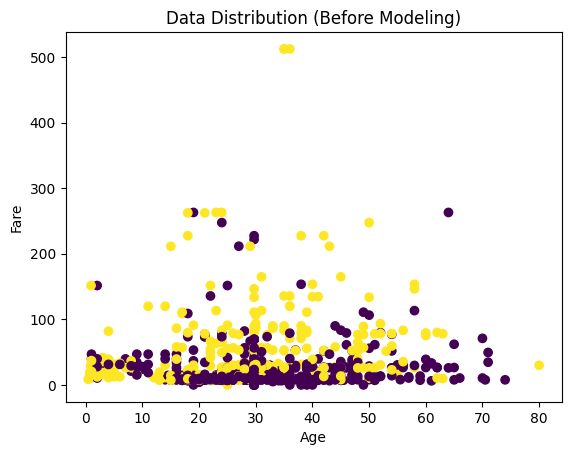

In [15]:
import matplotlib.pyplot as plt

# Using only two features for visualization
plt.scatter(cleaned_data['Age'], cleaned_data['Fare'], c=cleaned_data['Survived'])
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Data Distribution (Before Modeling)')
plt.show()

A scatter plot was created to explore the relationship between Age and Fare. This visualization helps me observe possible patterns, detect outliers, and understand whether the relationship between these variables is linear or non-linear. Age and Fare were selected because they are both continuous features and are likely to have an impact on a passenger’s probability of survival.

In [19]:
X = X.drop(['Name', 'Ticket', 'Cabin'], axis=1, errors='ignore')
X = pd.get_dummies(X, drop_first=True)



Text-based columns that do not add meaningful value to the prediction task were removed from the dataset. After that, categorical features were transformed into numerical values using one-hot encoding so that the data could be properly understood and processed by machine learning models.

### Data Spliting

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train , y_test = train_test_split(X, y, test_size=0.2, random_state=100)

I used an **80/20 split** so the model learns from most of the data (80%) while still keeping a portion of (20%) for testing.

And I choose an **80/20 train–test split** because the dataset is not very large, and having more training data helps the model learn better.


### Model Building


#### Model 1: Logistic Regression

Logistic Regression was chosen because it is simple, fast, and well-suited for binary classification problems like survival prediction. Since the Titanic outcome is either survived or not survived, this model fits the task well. It is also easy to interpret and serves as a good baseline before using more complex models.

#### Model 2: Random Forest

Random Forest was selected because it can capture complex and non-linear relationships in the data. Survival on the Titanic depends on several interacting factors such as age, gender, and passenger class, which this model can handle effectively. Compared to simpler models, Random Forest is more robust and less likely to overfit.

In [34]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)


In [35]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)



After training, both models were used to predict survival outcomes on the test dataset.

###Evaluation Metrics

In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


In [37]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print("Logistic Regression Evaluation")
print("Accuracy:", accuracy_score(y_test,y_pred_log))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_log))




Logistic Regression Evaluation
Accuracy: 0.8044692737430168

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       104
           1       0.80      0.71      0.75        75

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179



In [38]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print("\nRandom Forest Evaluation")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))



Random Forest Evaluation
Accuracy: 0.8268156424581006

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.89      0.86       104
           1       0.83      0.73      0.78        75

    accuracy                           0.83       179
   macro avg       0.83      0.81      0.82       179
weighted avg       0.83      0.83      0.82       179



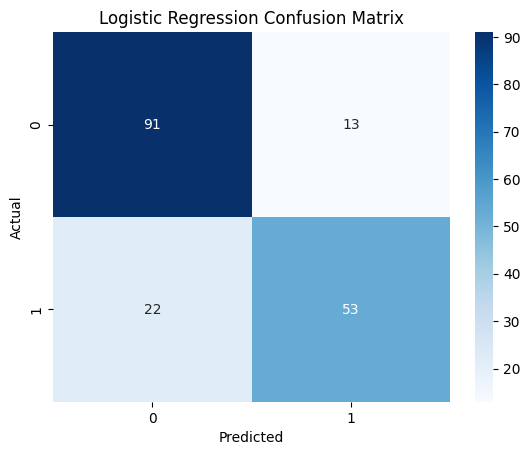

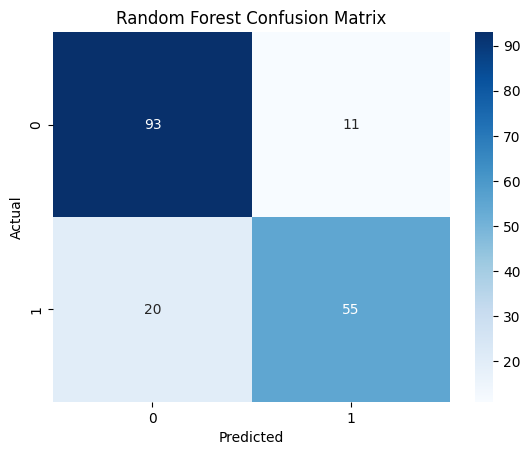

In [33]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(title)
    plt.show()

plot_confusion_matrix(y_test, y_pred_log, "Logistic Regression Confusion Matrix")
plot_confusion_matrix(y_test, y_pred_rf, "Random Forest Confusion Matrix")


The model was evaluated using accuracy, precision, recall, and F1-score. A classification report was used to summarize these metrics for each class, while a confusion matrix was generated to better understand the model’s prediction errors.

### Model Comaparsion

The Random Forest model performed better than Logistic Regression because it can handle complex relationships between features such as age, gender, and passenger class. Logistic Regression worked well as a baseline model but struggled with non-linear patterns in the data.

Logistic Regression mainly struggled with capturing interactions between features, while Random Forest, although more accurate, is less interpretable and can still make some prediction errors.

Preprocessing had a significant impact on the results. Removing text-based columns and encoding categorical variables allowed both models to train correctly and improved their overall performance.

### Reflection

This week, I learned how to train machine learning models and evaluate their performance using metrics such as accuracy, precision, recall, and F1-score. I also realized how important proper preprocessing is, since it directly affects how well a model can learn from the data.

One of the main challenges was handling categorical data correctly and making sense of the evaluation metrics, especially when comparing the results of different models.